# <span style="color:#0b486b">  FIT5215: Deep Learning (2021)</span>
***
*CE/Lecturer:*  **Dr Trung Le** | trunglm@monash.edu <br/>
*Head TA:*  **Dr Van Nguyen** | van.nguyen1@monash.edu <br/>
*Tutor:* **Mr Anh Bui** \[tuananh.bui@monash.edu\] | **Mr Tuan Nguyen**  \[tuan.ng@monash.edu \] | **Dr Binh Nguyen** \[binh.nguyen1@monash.edu\] | **Dr Mahmoud Mohammad** \[mahmoud.hossam@monash.edu\]
<br/> <br/>
Faculty of Information Technology, Monash University, Australia
***

# <span style="color:#0b486b">Tutorial 3b: Feed-forward Neural Nets with TensorFlow 2.x</span>
**This continues Tutorial 2a and shows you how to implement a feedforward neural network using TF 2.x**:  
- ***Inspect how to use keras in TF 2.x to fulfill the task. As you can see later the implementation is much simpler*.**


***

### <span style="color:#0b486b"> II.1 Feedforward Neural Network </span> <span style="color:red">***** (highly important)</span>
#### <span style="color:#0b486b"> Tutorial objective </span>

In this tutorial, we will consider a fairly realistic deep NN with *three* layers plus the *output* layer. Its architecture will be specified as $16 \rightarrow 10 (ReLU) \rightarrow 20 (ReLU) \rightarrow 15 (ReLU) \rightarrow 26$. This means:
- The input size is 16
- The first layer has 10 hidden units with 10 ReLU activation functions
- The second layer has 20 hidden units with 20 ReLU activation functions
- The third layer has 15 hidden units with 15 ReLU activation functions
- And the output layer is a logit layer with 26 hidden units

This network, for example, can take the `letter` dataset input with $16$ features and with $26$ classes (A-Z). **Our objective in this tutorial is to implement this specific network in `TensorFlow 1.x`.**

### <span style="color:#0b486b"> II.2 Implementation with TensorFlow 2.x</span> <span style="color:red">***** (highly important)</span>
We now shall implement the aforementioned network with the architecture of $16 \rightarrow 10 (ReLU) \rightarrow 20 (ReLU) \rightarrow 15 (ReLu) \rightarrow 26$ in Tensorflow using the dataset `letter`. 

This letter dataset can be found at [the LIBSVM website](https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/multiclass.html#letter). Here is the dataset information:
-  *The objective is to identify each of a large number of black-and-white rectangular pixel displays as one of the 26 capital letters in the English alphabet. The character images were based on 20 different fonts and each letter within these 20 fonts was randomly distorted to produce a file of 20,000 unique stimuli. Each stimulus was converted into 16 primitive numerical attributes (statistical moments and edge counts) which were then scaled to fit into a range of integer values from 0 through 15*

A typical pipeline process of implementing a deep learning model is as follows:

1. **Data processing**: 
    - Load the dataset and split it into train, valid, and test sets.  
     
2. **Building the model**: 
    - Build the model using keras layers.
     
3. **Compiling the model**: 
    - Compile the model and specify the optimizer, the loss (e.g., cross-entropy loss) you want to optimize, metrics you want to measure. 
    
4. **Training and evaluating**:
    - Train the model with a specific training set and validation set in a number of epochs.
    - Predict the test set and assess its performance.

#### <span style="color:#0b486b">1. Data Processing </span>

We use `sklearn` to load the dataset.

In [1]:
import os
import numpy as np
from sklearn.datasets import load_svmlight_file

In [2]:
data_file_name= "letter_scale.libsvm"
data_file = os.path.abspath("./data/" + data_file_name)
X_data, y_data = load_svmlight_file(data_file)
X_data= X_data.toarray()
print("X data shape: {}".format(X_data.shape))
print("y data shape: {}".format(y_data.shape))
print("# classes: {}".format(len(np.unique(y_data))))
print(np.unique(y_data))

X data shape: (15000, 16)
y data shape: (15000,)
# classes: 26
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26.]


We use `sklearn` to split the dataset into the train, validation, and test sets. 


In [3]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

def train_valid_test_split(data, target, train_size, test_size):
    valid_size = 1 - (train_size + test_size)
    X1, X_test, y1, y_test = train_test_split(data, target, test_size = test_size, random_state= 33)
    X_train, X_valid, y_train, y_valid = train_test_split(X1, y1, test_size = float(valid_size)/(valid_size+ train_size))
    return X_train, X_valid, X_test, y_train, y_valid, y_test

Next, we would like to encode the label in the form of numeric vector. For example, we want to turn $y\_data=["cat", "dog", "cat", "lion", "dog"]$ to $y\_data=[0,1,0,2,1]$.

To do this, in the following segment of code, we use the object `le` as an instance of the class `preprocessing.LabelEncoder()` which supports us to transform categorical labels in `y_data` to a numerical vector.

In [4]:
le = preprocessing.LabelEncoder()
le.fit(y_data.ravel())
y_data= le.transform(y_data)
print(y_data[:])

[25 15 18 ...  0 11 21]


We now use the function defined above to prepare our data for training, validating and testing.

In [5]:
X_train, X_valid, X_test, y_train, y_valid, y_test = train_valid_test_split(X_data, y_data, train_size=0.8, test_size=0.1)
y_train= y_train.reshape(-1)
y_test= y_test.reshape(-1)
y_valid= y_valid.reshape(-1)
print(X_train.shape, X_valid.shape, X_test.shape)
print(y_train.shape, y_valid.shape, y_test.shape)
print("lables: {}".format(np.unique(y_train)))

(12000, 16) (1500, 16) (1500, 16)
(12000,) (1500,) (1500,)
lables: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]


In [6]:
train_size= int(X_train.shape[0])
n_features= int(X_train.shape[1])
n_classes= len(np.unique(y_train))

#### <span style="color:#0b486b">2. Build up the model </span>

We build up a feedforward neural network with the architecture: $16 \rightarrow 10 (ReLU) \rightarrow 20 (ReLU) \rightarrow 15 (ReLu) \rightarrow 26$ in TensorFlow 2.x.

In [7]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential

In [8]:
print(tf.__version__)

2.5.0


In [9]:
dnn_model = Sequential()
dnn_model.add(Dense(units=10,  input_shape=(16,), activation='relu'))
dnn_model.add(Dense(units=20, activation='relu'))
dnn_model.add(Dense(units=15, activation='relu'))
dnn_model.add(Dense(units=n_classes, activation='softmax'))

In [10]:
dnn_model.build()  # computional graph
dnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                170       
_________________________________________________________________
dense_1 (Dense)              (None, 20)                220       
_________________________________________________________________
dense_2 (Dense)              (None, 15)                315       
_________________________________________________________________
dense_3 (Dense)              (None, 26)                416       
Total params: 1,121
Trainable params: 1,121
Non-trainable params: 0
_________________________________________________________________


In [11]:
dnn_model.layers

In [12]:
hidden1 = dnn_model.layers[0]
print(hidden1.name)

dense


In [13]:
model_init = dnn_model.get_weights()
weights, biases = hidden1.get_weights()

In [14]:
weights.shape

(16, 10)

In [15]:
biases.shape

(10,)

#### <span style="color:#0b486b">3. Compiling Model </span>

In [16]:
dnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#### <span style="color:#0b486b">4. Training and Evaluating </span>

In [17]:
history = dnn_model.fit(x=X_train, y=y_train, batch_size=32, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
375/375 [==============================] - 1s 907us/step - loss: 2.9404 - accuracy: 0.1262 - val_loss: 2.2729 - val_accuracy: 0.3247
Epoch 2/20
375/375 [==============================] - 0s 643us/step - loss: 1.8908 - accuracy: 0.4113 - val_loss: 1.7285 - val_accuracy: 0.4653
Epoch 3/20
375/375 [==============================] - 0s 632us/step - loss: 1.6079 - accuracy: 0.5067 - val_loss: 1.5617 - val_accuracy: 0.5367
Epoch 4/20
375/375 [==============================] - 0s 632us/step - loss: 1.4684 - accuracy: 0.5633 - val_loss: 1.4562 - val_accuracy: 0.5707
Epoch 5/20
375/375 [==============================] - 0s 649us/step - loss: 1.3768 - accuracy: 0.5936 - val_loss: 1.3759 - val_accuracy: 0.5867
Epoch 6/20
375/375 [==============================] - 0s 653us/step - loss: 1.3061 - accuracy: 0.6137 - val_loss: 1.3088 - val_accuracy: 0.6173
Epoch 7/20
375/375 [==============================] - 0s 674us/step - loss: 1.2453 - accuracy: 0.6270 - val_loss: 1.2581 - val_accuracy:

We now can evaluate the trained model on the test set or any subset.

In [18]:
dnn_model.evaluate(X_test, y_test)  #return loss and accuracy

47/47 [==============================] - 0s 563us/step - loss: 0.8889 - accuracy: 0.7300


[0.8888612389564514, 0.7300000190734863]

In [19]:
X_new = X_test[:10]
y_prob = dnn_model.predict(X_new)
y_prob[0].round(2)

array([0.  , 0.  , 0.  , 0.24, 0.  , 0.05, 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.7 , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  ], dtype=float32)

In [20]:
y_pred = np.argmax(dnn_model.predict(X_new), axis=-1)
for i in range(X_new.shape[0]):
    if y_pred[i]==y_test[i]:
        print("Corrected predeiction!")
    else:
        print("Incorrect prediction!")

Incorrect prediction!
Corrected predeiction!
Incorrect prediction!
Incorrect prediction!
Corrected predeiction!
Corrected predeiction!
Corrected predeiction!
Corrected predeiction!
Corrected predeiction!
Corrected predeiction!


#### <span style="color:#0b486b">5. Visualizing the Performance and Loss Objective Function </span>

The `fit()` method returns a History object containing the training parameters (history.params), the list of epochs it went through (history.epoch), and most importantly a dictionary (history.history) containing the loss and extra metrics it measured at the end of each epoch on the training set and on the validation set (if any). If you use this dictionary to create a pandas DataFrame and call its plot() method, you get the learning curves shown in the following.

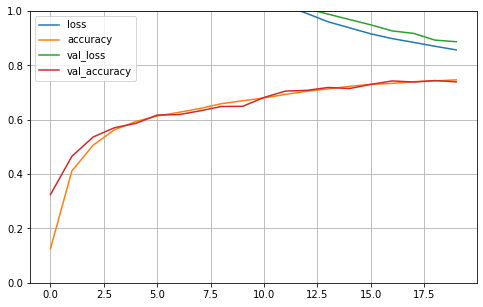

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

#### <span style="color:#0b486b">6. Playing around with different optimizers</span>

In [22]:
from tensorflow import keras
optimizer_names = ["Nadam", "Adam", "Adadelta", "Adagrad", "RMSprop", "SGD"]
optimizer_list = [keras.optimizers.Nadam(learning_rate=0.001), keras.optimizers.Adam(learning_rate=0.001), keras.optimizers.Adadelta(learning_rate=0.001), 
                  keras.optimizers.Adagrad(learning_rate=0.001), keras.optimizers.RMSprop(learning_rate=0.001), keras.optimizers.SGD(learning_rate=0.001)]
best_acc = 0
best_i = -1
for i in range(len(optimizer_list)):
    dnn_model.set_weights(model_init)
    print("*Evaluating with {}\n".format(str(optimizer_names[i])))
    dnn_model.compile(optimizer=optimizer_list[i], loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    dnn_model.fit(x=X_train, y=y_train, batch_size=32, epochs=30, validation_data=(X_valid, y_valid), verbose=0)
    acc = dnn_model.evaluate(X_test, y_test)[1]
    print("The test accuracy is {}\n".format(acc))
    if acc > best_acc:
        best_acc = acc
        best_i = i
print("The best accuracy is {} with {}".format(best_acc, optimizer_names[best_i]))
        

*Evaluating with Nadam

47/47 [==============================] - 0s 499us/step - loss: 0.8163 - accuracy: 0.7527
The test accuracy is 0.7526666522026062

*Evaluating with Adam

47/47 [==============================] - 0s 471us/step - loss: 0.7707 - accuracy: 0.7760
The test accuracy is 0.7760000228881836

*Evaluating with Adadelta

47/47 [==============================] - 0s 363us/step - loss: 3.2525 - accuracy: 0.0487
The test accuracy is 0.04866666719317436

*Evaluating with Adagrad

47/47 [==============================] - 0s 671us/step - loss: 3.1262 - accuracy: 0.0813
The test accuracy is 0.08133333176374435

*Evaluating with RMSprop

47/47 [==============================] - 0s 520us/step - loss: 0.8285 - accuracy: 0.7467
The test accuracy is 0.746666669845581

*Evaluating with SGD

47/47 [==============================] - 0s 520us/step - loss: 3.1807 - accuracy: 0.0880
The test accuracy is 0.08799999952316284

The best accuracy is 0.7760000228881836 with Adam


### <span style="color:#0b486b"> II.3 Other Approaches to Build Up Models with TensorFlow 2.x</span> <span style="color:red">*** (relatively important)</span>

#### <span style="color:#0b486b"> 1. Approach 1: Declaring a class inherited from `tf.keras.Model`</span>

In [23]:
class MyDNN(tf.keras.Model):
    def __init__(self, n_classes= 26):
        super(MyDNN, self).__init__()
        self.n_classes = n_classes
        self.dense1 = tf.keras.layers.Dense(units=10, activation= 'relu')
        self.dense2 = tf.keras.layers.Dense(units=20, activation= 'relu')
        self.dense3 = tf.keras.layers.Dense(units=15, activation= 'relu')
        self.dense4 = tf.keras.layers.Dense(units=self.n_classes, activation= 'softmax')
    
    def call(self,X): #X is the input, method call specifies how to compute the output from the input X
        h = self.dense1(X)
        h = self.dense2(h)
        h = self.dense3(h)
        h = self.dense4(h)
        return h

In [24]:
mydnn = MyDNN(n_classes= 26)
mydnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
mydnn.fit(x= X_train, y= y_train, batch_size= 64, epochs= 20, validation_data = (X_valid, y_valid))

Epoch 1/20
188/188 [==============================] - 0s 1ms/step - loss: 3.1689 - accuracy: 0.0828 - val_loss: 2.8698 - val_accuracy: 0.1507
Epoch 2/20
188/188 [==============================] - 0s 704us/step - loss: 2.4778 - accuracy: 0.2648 - val_loss: 2.1183 - val_accuracy: 0.3647
Epoch 3/20
188/188 [==============================] - 0s 709us/step - loss: 1.9907 - accuracy: 0.4020 - val_loss: 1.8032 - val_accuracy: 0.4667
Epoch 4/20
188/188 [==============================] - 0s 741us/step - loss: 1.7467 - accuracy: 0.4718 - val_loss: 1.6465 - val_accuracy: 0.5080
Epoch 5/20
188/188 [==============================] - 0s 736us/step - loss: 1.6075 - accuracy: 0.5138 - val_loss: 1.5547 - val_accuracy: 0.5333
Epoch 6/20
188/188 [==============================] - 0s 757us/step - loss: 1.5142 - accuracy: 0.5474 - val_loss: 1.4882 - val_accuracy: 0.5567
Epoch 7/20
188/188 [==============================] - 0s 704us/step - loss: 1.4443 - accuracy: 0.5718 - val_loss: 1.4218 - val_accuracy: 0

#### <span style="color:#0b486b"> 2. Approach 2: Using `tf.keras.Model` Directly</span>

In [25]:
X = tf.keras.layers.Input(shape=(16,)) #declare input layer
h = Dense(units=10, activation= 'relu')(X)
h = Dense(units=20, activation= 'relu')(h)
h = Dense(units=15, activation= 'relu')(h)
h = Dense(units=26, activation= 'softmax')(h)
dnn_model = tf.keras.Model(inputs= X, outputs=h)

In [26]:
dnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
dnn_model.fit(x= X_train, y= y_train, batch_size= 64, epochs= 20, validation_data = (X_valid, y_valid))

Epoch 1/20
188/188 [==============================] - 0s 1ms/step - loss: 3.1987 - accuracy: 0.0688 - val_loss: 3.0583 - val_accuracy: 0.0853
Epoch 2/20
188/188 [==============================] - 0s 768us/step - loss: 2.6083 - accuracy: 0.2072 - val_loss: 2.1814 - val_accuracy: 0.3100
Epoch 3/20
188/188 [==============================] - 0s 741us/step - loss: 1.9828 - accuracy: 0.3913 - val_loss: 1.8144 - val_accuracy: 0.4473
Epoch 4/20
188/188 [==============================] - 0s 731us/step - loss: 1.7234 - accuracy: 0.4799 - val_loss: 1.6431 - val_accuracy: 0.5127
Epoch 5/20
188/188 [==============================] - 0s 731us/step - loss: 1.5847 - accuracy: 0.5250 - val_loss: 1.5305 - val_accuracy: 0.5587
Epoch 6/20
188/188 [==============================] - 0s 757us/step - loss: 1.4864 - accuracy: 0.5635 - val_loss: 1.4480 - val_accuracy: 0.5773
Epoch 7/20
188/188 [==============================] - 0s 741us/step - loss: 1.4116 - accuracy: 0.5867 - val_loss: 1.3805 - val_accuracy: 0

#### <span style="color:#0b486b"> 3. Approach 3: Using Traditional Mini-batch Approach</span>

##### <span style="color:#0b486b">Define a DL model </span>

In [27]:
dnn_model = Sequential()
dnn_model.add(Dense(units=10,  input_shape=(16,), activation='relu'))
dnn_model.add(Dense(units=20, activation='relu'))
dnn_model.add(Dense(units=15, activation='relu'))
dnn_model.add(Dense(units=n_classes, activation='softmax'))
dnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

##### <span style="color:#0b486b">Train model in many epochs</span>

In [28]:
n_epochs =20
batch_size = 64
for epoch in range(n_epochs):
    for idx_start in range(0, X_train.shape[0], batch_size):
        idx_end = min(X_train.shape[0], idx_start + batch_size)
        X_batch, y_batch = X_train[idx_start:idx_end], y_train[idx_start:idx_end]
        train_loss_batch = dnn_model.train_on_batch(X_batch, y_batch)  #return the batch loss
        
    train_loss, train_acc = dnn_model.evaluate(x= X_train, y= y_train, batch_size= 64, verbose= 0)
    valid_loss, valid_acc = dnn_model.evaluate(x= X_valid, y= y_valid, batch_size= 64, verbose= 0)
    print('Epoch {}: train acc={:.4f}, train loss={:.4f} | valid acc={:.4f}, valid loss= {:.4f}'.format(epoch + 1, train_acc, train_loss, valid_acc, valid_loss))

Epoch 1: train acc=0.2031, train loss=2.8440 | valid acc=0.1973, valid loss= 2.8379
Epoch 2: train acc=0.3603, train loss=2.0544 | valid acc=0.3680, valid loss= 2.0491
Epoch 3: train acc=0.4647, train loss=1.7685 | valid acc=0.4620, valid loss= 1.7728
Epoch 4: train acc=0.5138, train loss=1.6146 | valid acc=0.5133, valid loss= 1.6179
Epoch 5: train acc=0.5567, train loss=1.4894 | valid acc=0.5567, valid loss= 1.4892
Epoch 6: train acc=0.5961, train loss=1.3852 | valid acc=0.5893, valid loss= 1.3807
Epoch 7: train acc=0.6194, train loss=1.3077 | valid acc=0.6187, valid loss= 1.3014
Epoch 8: train acc=0.6377, train loss=1.2450 | valid acc=0.6313, valid loss= 1.2390
Epoch 9: train acc=0.6504, train loss=1.1955 | valid acc=0.6480, valid loss= 1.1906
Epoch 10: train acc=0.6632, train loss=1.1533 | valid acc=0.6647, valid loss= 1.1504
Epoch 11: train acc=0.6756, train loss=1.1161 | valid acc=0.6787, valid loss= 1.1157
Epoch 12: train acc=0.6873, train loss=1.0830 | valid acc=0.6800, valid lo

### <span style="color:#0b486b"> Additional Exercises </span> 

1. Write your own code to save a trained model to the hard disk and restore this model, then use the restored model to output the prediction result on the test set.

2. Write code to tune the learning rate in the list [0.1, 0.01, 0.001, 0.005] for Adam.

3. Insert new code to the above code to enable outputting to TensorBoard the values of `training loss`, `training accuracy`, `valid loss`, and `valid accuracy` at the end of epochs. You can refer to the code [here](https://www.tensorflow.org/tensorboard/get_started).

4. Write code to do regression on the dataset `cadata` which can be downloaded [here](https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/regression.html). Note that for a regression problem, you need to use the `L2` loss instead of the `cross-entropy` loss as in a classification problem. 

### <span style="color:#FFA500"> Solution for the exercise 1

A Keras model can be saved and restored via two functions `save()` and `load_model()`.

In [29]:
from tensorflow.keras import models 
checkpoint_path = "ckpt/tf2"

dnn_model.save(checkpoint_path)
reconstructed_model = models.load_model(checkpoint_path)

print("Model is saved to: {}".format(checkpoint_path))

INFO:tensorflow:Assets written to: ckpt/tf2\assets
Model is saved to: ckpt/tf2


We now can evaluate the reconstructed model on the test sett.

In [30]:
reconstructed_model.evaluate(X_test, y_test)

47/47 [==============================] - 0s 689us/step - loss: 0.9864 - accuracy: 0.7200


[0.9864100813865662, 0.7200000286102295]

### <span style="color:#FFA500"> Solution for the exercise 2

Similar to Section II.2.6, we can replace the list of optimizers by a list of learning rates. 

In [31]:
from tensorflow import keras
learning_rates = [0.1, 0.01, 0.001, 0.005]
optimizer_list = [keras.optimizers.Adam(learning_rate=lr) for lr in learning_rates]
best_acc = 0
best_i = -1
for i in range(len(optimizer_list)):
    dnn_model.set_weights(model_init)
    print("*Evaluating with learning rate = {}\n".format(str(learning_rates[i])))
    dnn_model.compile(optimizer=optimizer_list[i], loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    dnn_model.fit(x=X_train, y=y_train, batch_size=32, epochs=30, validation_data=(X_valid, y_valid), verbose=0)
    acc = dnn_model.evaluate(X_test, y_test)[1]
    print("The test accuracy is {}\n".format(acc))
    if acc > best_acc:
        best_acc = acc
        best_i = i
print("The best accuracy is {} with {}".format(best_acc, learning_rates[best_i]))

*Evaluating with learning rate = 0.1

47/47 [==============================] - 0s 544us/step - loss: 2.5355 - accuracy: 0.1420
The test accuracy is 0.1420000046491623

*Evaluating with learning rate = 0.01

47/47 [==============================] - 0s 624us/step - loss: 0.5593 - accuracy: 0.8167
The test accuracy is 0.8166666626930237

*Evaluating with learning rate = 0.001

47/47 [==============================] - 0s 633us/step - loss: 0.8121 - accuracy: 0.7573
The test accuracy is 0.7573333382606506

*Evaluating with learning rate = 0.005

47/47 [==============================] - 0s 512us/step - loss: 0.6455 - accuracy: 0.7920
The test accuracy is 0.7919999957084656

The best accuracy is 0.8166666626930237 with 0.01


### <span style="color:#FFA500"> Solution for the exercise 3

Firstly, we define a deep learning model. 

In [32]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
X = tf.keras.layers.Input(shape=(16,)) # declare input layer
h = Dense(units=10, activation= 'relu')(X)
h = Dense(units=20, activation= 'relu')(h)
h = Dense(units=15, activation= 'relu')(h)
h = Dense(units=26, activation= 'softmax')(h)
dnn_model = tf.keras.Model(inputs= X, outputs=h)

Next, let us combine the defined model with an optimizer, loss, and metrics.
Adding a `tf.keras.callbacks.TensorBoard` callback will enable outputting the values of `training loss`, `training accuracy`, `valid loss`, and `valid accuracy` at the end of epochs.

In [33]:
import datetime
dnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
log_dir = "logs/tf2/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")  # declare the directory to save logs.
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
dnn_model.fit(x=X_train, y=y_train, batch_size=32, epochs=100, validation_data=(X_valid, y_valid), callbacks=[tensorboard_callback])

Epoch 1/100
375/375 [==============================] - 1s 3ms/step - loss: 2.9862 - accuracy: 0.1168 - val_loss: 2.3230 - val_accuracy: 0.2913
Epoch 2/100
375/375 [==============================] - 0s 691us/step - loss: 1.8472 - accuracy: 0.4440 - val_loss: 1.5941 - val_accuracy: 0.5400
Epoch 3/100
375/375 [==============================] - 0s 686us/step - loss: 1.4707 - accuracy: 0.5722 - val_loss: 1.3960 - val_accuracy: 0.5980
Epoch 4/100
375/375 [==============================] - 0s 671us/step - loss: 1.3151 - accuracy: 0.6125 - val_loss: 1.2630 - val_accuracy: 0.6373
Epoch 5/100
375/375 [==============================] - 0s 688us/step - loss: 1.2262 - accuracy: 0.6387 - val_loss: 1.1913 - val_accuracy: 0.6573
Epoch 6/100
375/375 [==============================] - 0s 683us/step - loss: 1.1632 - accuracy: 0.6650 - val_loss: 1.1486 - val_accuracy: 0.6793
Epoch 7/100
375/375 [==============================] - 0s 683us/step - loss: 1.1128 - accuracy: 0.6813 - val_loss: 1.1014 - val_accu

- Open command line, nevigate to the folder of this tute and run **> tensorboard --logdir "logs/tf2"**

### <span style="color:#FFA500"> Solution for the exercise 4

In [34]:
# We load and process the dataset
data_file_name= "cadata.libsvm"
data_file = os.path.abspath("./data/" + data_file_name)
X_data, y_data = load_svmlight_file(data_file)
X_data= X_data.toarray()
y_data= y_data.reshape(y_data.shape[0],-1)
print("X data shape: {}".format(X_data.shape))
print("y data shape: {}".format(y_data.shape))
print("x-min={}, x-max={}".format(np.min(X_data), np.max(X_data)))
print("We need to scale the features of this data into [-1,1]")

X data shape: (20640, 8)
y data shape: (20640, 1)
x-min=-124.35, x-max=39320.0
We need to scale the features of this data into [-1,1]


In [35]:
# We scale the features of this data into [-1,1]
from sklearn.preprocessing import MinMaxScaler
X_data= MinMaxScaler(feature_range= (-1,1)).fit_transform(X_data)
print("x-min={}, x-max={}".format(np.min(X_data), np.max(X_data)))

x-min=-1.0, x-max=1.0


In [36]:
print("Before scaling: y-min ={}, y-max ={}".format(np.min(y_data), np.max(y_data)))
y_data= MinMaxScaler(feature_range= (-1,1)).fit_transform(y_data)
print("After scaling: y-min ={}, y-max ={}".format(np.min(y_data), np.max(y_data)))
print("Next step is to split the dataset into train (80%), valid (10%), and test (10%)")

Before scaling: y-min =14999.0, y-max =500001.0
After scaling: y-min =-0.9999999999999999, y-max =1.0
Next step is to split the dataset into train (80%), valid (10%), and test (10%)


In [37]:
# We split train, valid and test data
X_train, X_valid, X_test, y_train, y_valid, y_test = train_valid_test_split(X_data, y_data, train_size=0.8, test_size=0.1)
y_train= y_train.reshape(-1)
y_test= y_test.reshape(-1)
y_valid= y_valid.reshape(-1)
print(X_train.shape, X_valid.shape, X_test.shape)
print(y_train.shape, y_valid.shape, y_test.shape)
print("Three sets are ready! Next step is to build up a deep neural network.")

(16512, 8) (2064, 8) (2064, 8)
(16512,) (2064,) (2064,)
Three sets are ready! Next step is to build up a deep neural network.


In [38]:
regression_model = Sequential()
regression_model.add(Dense(units=1)) # output has only one neuron
regression_model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.0001), loss='mean_squared_error')

In [39]:
history = regression_model.fit(x= X_train, y= y_train, batch_size= 32, epochs= 50, validation_data = (X_valid, y_valid))

Epoch 1/50
516/516 [==============================] - 0s 503us/step - loss: 1.1897 - val_loss: 0.9961
Epoch 2/50
516/516 [==============================] - 0s 399us/step - loss: 0.8215 - val_loss: 0.7060
Epoch 3/50
516/516 [==============================] - 0s 391us/step - loss: 0.5978 - val_loss: 0.5356
Epoch 4/50
516/516 [==============================] - 0s 392us/step - loss: 0.4707 - val_loss: 0.4409
Epoch 5/50
516/516 [==============================] - 0s 395us/step - loss: 0.4016 - val_loss: 0.3885
Epoch 6/50
516/516 [==============================] - 0s 392us/step - loss: 0.3617 - val_loss: 0.3550
Epoch 7/50
516/516 [==============================] - 0s 395us/step - loss: 0.3342 - val_loss: 0.3292
Epoch 8/50
516/516 [==============================] - 0s 383us/step - loss: 0.3118 - val_loss: 0.3070
Epoch 9/50
516/516 [==============================] - 0s 383us/step - loss: 0.2923 - val_loss: 0.2875
Epoch 10/50
516/516 [==============================] - 0s 386us/step - loss: 0.275

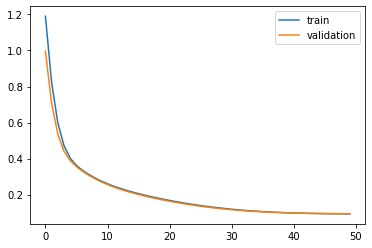

In [40]:
# plot losses during training
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='validation')
pyplot.legend()
pyplot.show()

We now can evaluate our regression model on the test set.

In [41]:
regression_model.evaluate(X_test, y_test) 

65/65 [==============================] - 0s 372us/step - loss: 0.0942


0.0941537469625473

---
### <span style="color:#0b486b"> <div  style="text-align:center">**THE END**</div> </span>